### Problem 01 - Zoo
Implement a KNN model to classify the animals in to categorie

#### 1. Importing the Libraries

In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,cross_val_score, LeaveOneOut

####  2. Importing the Data

In [3]:
data_1 = pd.read_csv('Zoo.csv')
data_1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


####  3. Data Understanding

In [4]:
data_1.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [5]:
data_1.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
data_1.shape

(101, 18)

In [8]:
data_1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
data_1['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [11]:
# from above there total 7 class for animal classification and class 1 have highest frequency of animal.
## no description for classes are given.
###

In [19]:
corr_1 = data_1.corr()

<AxesSubplot:>

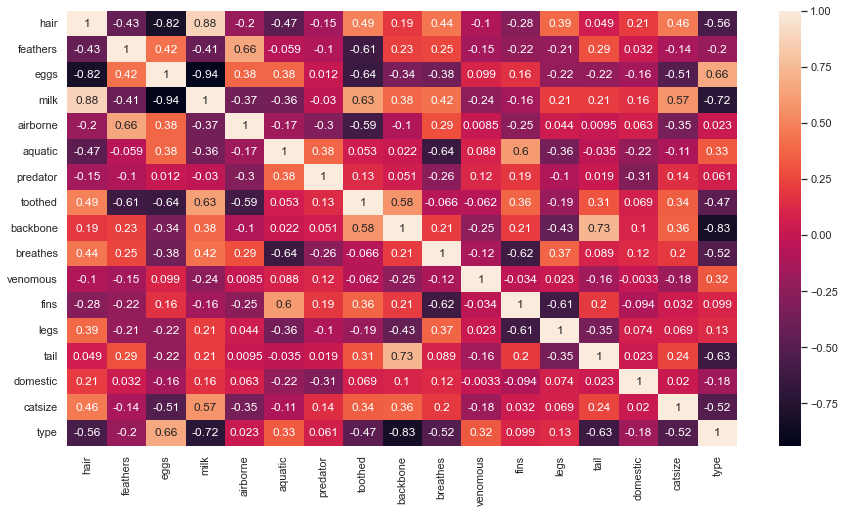

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_1, annot = True )

In [23]:
# Few high correlations are observed

#### 4. Data Preparation

In [38]:
X = data_1.drop(labels = ['type','animal name'], axis = 1)
y = data_1[['type']]

In [39]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [40]:
y.head()

,type
0,1
1,1
2,4
3,1
4,1


In [41]:
X.shape , y.shape

((101, 16), (101, 1))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

In [48]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((80, 16), (21, 16), (80, 1), (21, 1))

#### 5. Model Building | 6.Model Training | 7. Model Testing

In [63]:
print('Training Accuracy Comparison fro different values of K')
acc_score = []
i_for_graph = []
for i in range(2,22):
    if i%2 == 1:
        knn_classifier_i = KNeighborsClassifier(n_neighbors=i)
        knn_classifier_i.fit(X_train,y_train)
        y_pred_i = knn_classifier_i.predict(X_train)
        acc_score_i = round(accuracy_score(y_train,y_pred_i),4)
        acc_score.append(acc_score_i)
        print('Accuracy Score for K=',i,': ', acc_score_i)
        i_for_graph.append(i)
        i=i+1 
    else :
        i=i+1 
print(np.max(acc_score))

Training Accuracy Comparison fro different values of K
Accuracy Score for K= 3 :  0.9625
Accuracy Score for K= 5 :  0.925
Accuracy Score for K= 7 :  0.825
Accuracy Score for K= 9 :  0.8125
Accuracy Score for K= 11 :  0.7875
Accuracy Score for K= 13 :  0.7875
Accuracy Score for K= 15 :  0.7875
Accuracy Score for K= 17 :  0.7875
Accuracy Score for K= 19 :  0.7875
Accuracy Score for K= 21 :  0.7625
0.9625


In [59]:
acc_score

[0.9625, 0.925, 0.825, 0.8125, 0.7875, 0.7875, 0.7875, 0.7875, 0.7875, 0.7625]

In [64]:
i_for_graph

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [57]:
print('Testing Accuracy Comparison for different values of K')
acc_score_test = []
for i in range(2,22):
    if i%2 == 1:
        knn_classifier_i = KNeighborsClassifier(n_neighbors=i)
        knn_classifier_i.fit(X_train,y_train)
        y_pred_test_i = knn_classifier_i.predict(X_test)
        acc_score_test_i = round(accuracy_score(y_test,y_pred_test_i),4)
        acc_score_test.append(acc_score_test_i)
        print('Accuracy Score for K=',i,': ', acc_score_test_i)
        i=i+1 
    else :
        i=i+1 
print(np.max(acc_score_test))

Testing Accuracy Comparison for different values of K
Accuracy Score for K= 3 :  1.0
Accuracy Score for K= 5 :  0.8571
Accuracy Score for K= 7 :  0.8095
Accuracy Score for K= 9 :  0.8095
Accuracy Score for K= 11 :  0.7619
Accuracy Score for K= 13 :  0.7619
Accuracy Score for K= 15 :  0.7619
Accuracy Score for K= 17 :  0.7619
Accuracy Score for K= 19 :  0.7619
Accuracy Score for K= 21 :  0.7143
1.0


In [60]:
acc_score_test

[1.0, 0.8571, 0.8095, 0.8095, 0.7619, 0.7619, 0.7619, 0.7619, 0.7619, 0.7143]

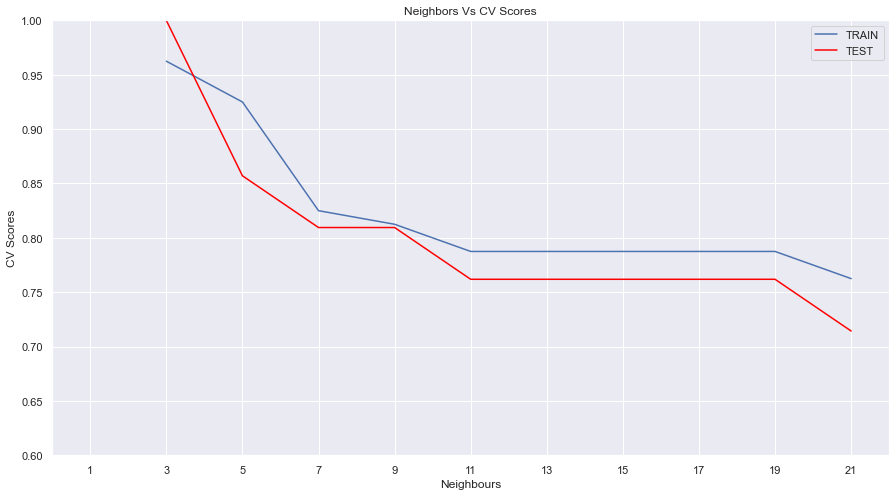

In [93]:
plt.plot(i_for_graph,acc_score, label = 'TRAIN')
plt.plot(i_for_graph,acc_score_test, color = 'red', label = 'TEST')
plt.legend()
plt.xlim(0,22)
plt.xticks(range(1,23,2)) 
plt.ylim(0.6, 1)
plt.xlabel('Neighbours')
plt.ylabel('CV Scores')
plt.title('Neighbors Vs CV Scores')
plt.show()

In [94]:
# from above we can conclude training and testing accuracy is higher fro K value  =3 it is 96.25 % and 100%  respectively
## so the K = 3 is selected for model.

#### 8. Output Evaluation

In [132]:
knn_classifier_3 = KNeighborsClassifier(n_neighbors=3)
knn_classifier_3.fit(X_train,y_train)
y_pred_3 = knn_classifier_3.predict(X_train)
y_pred_test_3 = knn_classifier_3.predict(X_test)

In [133]:
print('Accuracy Score for Train data:\n', round(accuracy_score(y_train,y_pred_3),4))
print('Confusion Matrix for Train data :\n' ,confusion_matrix(y_train, y_pred_3))
print('Accuracy Score for Test data:\n', round(accuracy_score(y_test,y_pred_test_3),4))
print('Confusion Matrix for Test data :\n',confusion_matrix(y_test, y_pred_test_3))

Accuracy Score for Train data:
 0.9625
Confusion Matrix for Train data :
 [[33  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0]
 [ 0  0  1  2  1  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  8]]
Accuracy Score for Test data:
 1.0
Confusion Matrix for Test data :
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1baae8bc9d0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1baae50f2b0>)

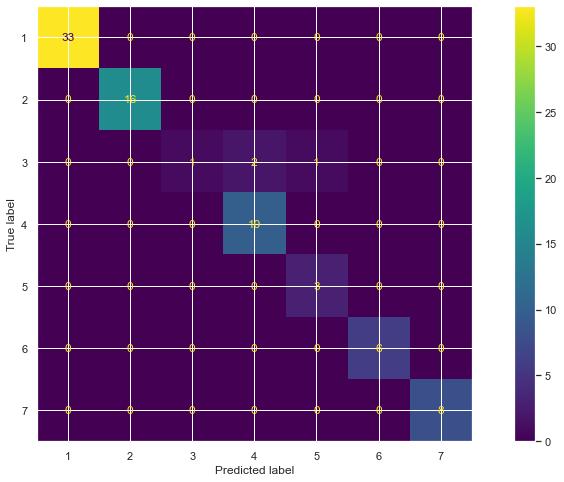

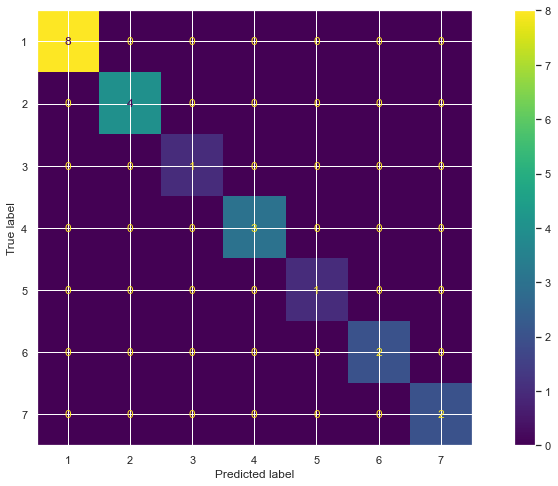

In [134]:
plot_confusion_matrix(knn_classifier_3, X_train, y_train), plot_confusion_matrix(knn_classifier_3, X_test, y_test)

In [139]:
%%time
n_fold = KFold(n_splits=5,shuffle=True, random_state=12)

cv_scores = cross_val_score(estimator = knn_classifier_3,X = X,y=y,cv=n_fold)
print('CV Scores     : ',cv_scores)
print('Mean Accuracy : ',cv_scores.mean())
print('Std Deviation : ',cv_scores.std())

CV Scores     :  [0.9047619 0.85      0.9       0.85      0.95     ]
Mean Accuracy :  0.8909523809523809
Std Deviation :  0.03771837399678638
Wall time: 67.8 ms


In [138]:
%%time
loocv = LeaveOneOut()
cv_scores = cross_val_score(estimator = knn_classifier_3,X = X,y=y,cv=loocv)
print('CV Scores     : ',cv_scores)
print('Mean Accuracy : ',cv_scores.mean())
print('Std Deviation : ',cv_scores.std())

CV Scores     :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
Mean Accuracy :  0.9504950495049505
Std Deviation :  0.21691982475452126
Wall time: 756 ms
